In [2]:
#Imoorting Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

#Loading Dataset
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

c:\Users\whitt\anaconda3\envs\python_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


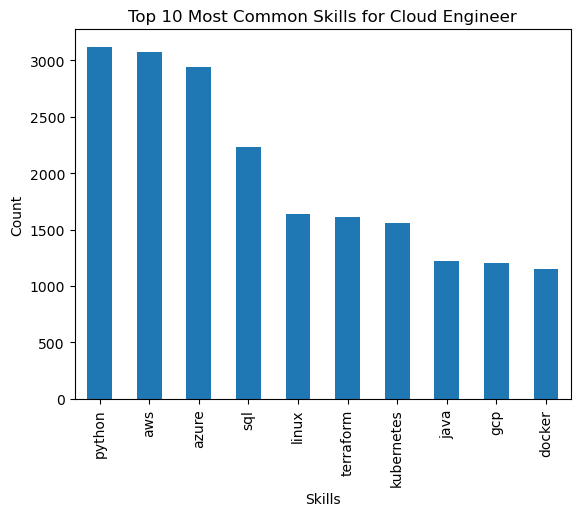

In [3]:
df_cloud = df[df['job_title_short'] == 'Cloud Engineer'].copy()
df_exploded = df_cloud.explode('job_skills')
skill_count = df_exploded['job_skills'].value_counts().head(10)
skill_count.plot(kind='bar')
plt.xlabel('Skills')
plt.ylabel('Count')
plt.title('Top 10 Most Common Skills for Cloud Engineer')
plt.show()

In [4]:
df_exploded = df.explode('job_skills')
skills_avg = df_exploded.groupby('job_skills')['salary_year_avg'].mean().reset_index()
skills_avg = skills_avg.sort_values(by='salary_year_avg', ascending=False).head()

skills_avg

,job_skills,salary_year_avg
46,debian,196500.000000
177,ringcentral,182500.000000
114,lua,170500.000000
126,mongo,169526.929749
54,dplyr,160667.210526


In [5]:
df_explode = df.explode('job_skills')
skills = df_explode.groupby('job_title_short')['job_skills'].nunique().reset_index()
skills.columns = ['job_title_short', 'num_unique_skills']
skills.head()

,job_title_short,num_unique_skills
0,Business Analyst,223
1,Cloud Engineer,213
2,Data Analyst,235
3,Data Engineer,239
4,Data Scientist,237


In [6]:
df['job_location'].head()

0                   Watertown, CT
1    Guadalajara, Jalisco, Mexico
2                 Berlin, Germany
3                 San Antonio, TX
4                  Washington, DC
Name: job_location, dtype: object